## Import libraries

In [37]:
#Get libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## Customize

In [39]:
#Customize your application 

#Name of the file where you have historical data
myfile='0201 Revenue_day.csv'

#Days in first moving average
ma1_day=30

#Days in second moving average
ma2_day=90

#Name the file where you want to store the forecast values 
forecast_file='0202 forecasted_revenue_ma.csv'

#Name the jpg file where you want tosave the MA plot 
myplot='0202 ma_plot.jpg'

#Name the jpg file where you want tosave the plot of forecast and actual 
predplot='0202 pred_plot.jpg'

## Load data and pre-process

In [41]:
# Load the CSV file
file_path = myfile
df = pd.read_csv(file_path)

#If we want to use some limited number of days
#df=df.tail(200)

# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%y')

# Set the Date column as the index
df.set_index('Date', inplace=True)

## Calculate moving averages

In [43]:
# Calculate moving averages

#Option A: Simple moving average
'''
# Computing two simple moving averages
df['MA_1'] = df['Revenue'].rolling(window=ma1_day).mean()  
df['MA_2'] = df['Revenue'].rolling(window=ma2_day).mean()  
'''
# End of Option A

#Option B: Weighted moving average
#'''
# Function to calculate the Weighted Moving Average for a given window
def weighted_moving_average(series):
    window = len(series)
    weights = np.arange(1, window + 1)
    return np.dot(series, weights) / weights.sum()

# Computing two Weighted Moving Average (WMA)
df['MA_1'] = df['Revenue'].rolling(window=ma1_day).apply(weighted_moving_average, raw=True)

df['MA_2'] = df['Revenue'].rolling(window=ma2_day).apply(weighted_moving_average, raw=True)

#''' 
# End of Option B

#Option C: Exponential moving average
'''
# Computing two exponential moving averages
df['MA_1'] = df['Revenue'].ewm(span=ma1_day, adjust=False).mean()
df['MA_2'] = df['Revenue'].ewm(span=ma2_day, adjust=False).mean()
'''
# End of Option C

"\n# Computing two exponential moving averages\ndf['MA_1'] = df['Revenue'].ewm(span=ma1_day, adjust=False).mean()\ndf['MA_2'] = df['Revenue'].ewm(span=ma2_day, adjust=False).mean()\n"

## Plot moving averages

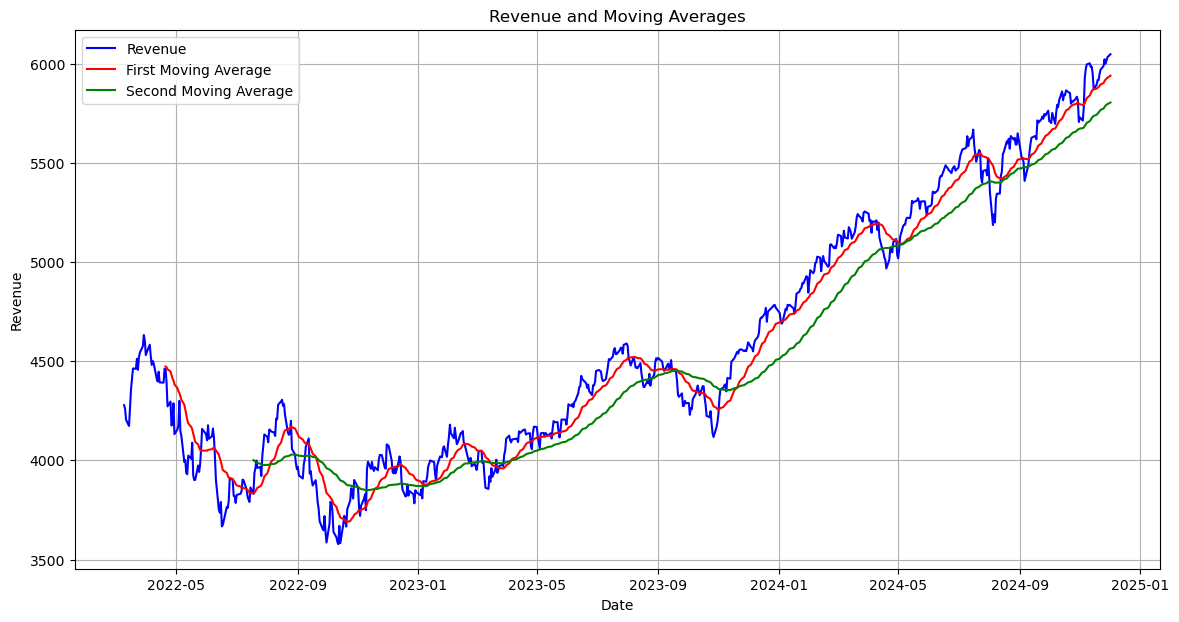

In [45]:
# Plot the closing prices and moving averages
plt.figure(figsize=(14, 7))
plt.plot(df['Revenue'], label='Revenue', color='blue')
plt.plot(df['MA_1'], label='First Moving Average', color='red')
plt.plot(df['MA_2'], label='Second Moving Average', color='green')
plt.title('Revenue and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)

# Save the plot to a JPG file
plt.savefig(myplot, format='jpg')

plt.show()


## Forecast using moving averages 

In [47]:
# Drop any rows with NaN values (due to rolling mean calculation)
df = df.dropna()

# Use only the last specified days of data
df_pred = df.tail(100)

# Features and target variable (using only the moving averages as features)
X = df_pred[['MA_1', 'MA_2']]
y = df_pred['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


## Plot actual and predicted

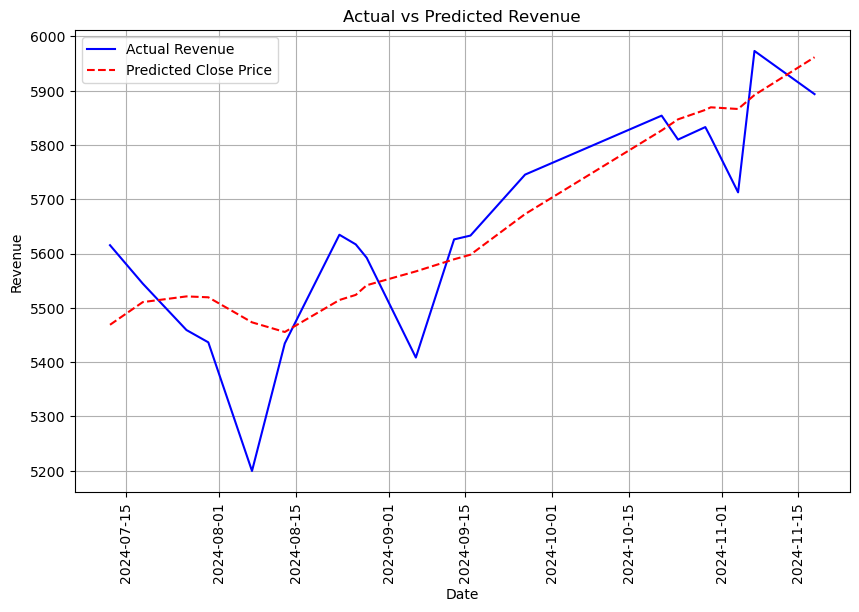

In [49]:
# Sort the test set by date before plotting
y_test_sorted = y_test.sort_index()
y_pred_sorted = pd.Series(y_pred, index=y_test.index).sort_index()

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted.index, y_test_sorted, label='Actual Revenue', color='blue')
plt.plot(y_test_sorted.index, y_pred_sorted, label='Predicted Close Price', color='red', linestyle='--')
plt.title('Actual vs Predicted Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)

# Save the plot to a JPG file
plt.savefig(predplot, format='jpg')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)
plt.show()


## Evaluate the model

In [51]:
# Evaluate the model
mse = mean_squared_error(y_test_sorted, y_pred_sorted)
r2 = r2_score(y_test_sorted, y_pred_sorted)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 10423.240902954578
R^2 Score: 0.70660112346463
